In [18]:
import matplotlib.pyplot as plt
from __future__ import annotations
from BikeData import BikeData

# Bike Data
The `BikeData` class allows for easy manipulation of the washington bike data. You can call it either on a csv file or a `pd.DataFrame` object. The `subset` method is the main way of filtering the data. If you read the docstring examples of how to use it are given if you do not understand the code.

The `union` method is used to join two mutually exclusive subsets. This is useful during peak hours which occur over two windows of time.

## Total bike rental

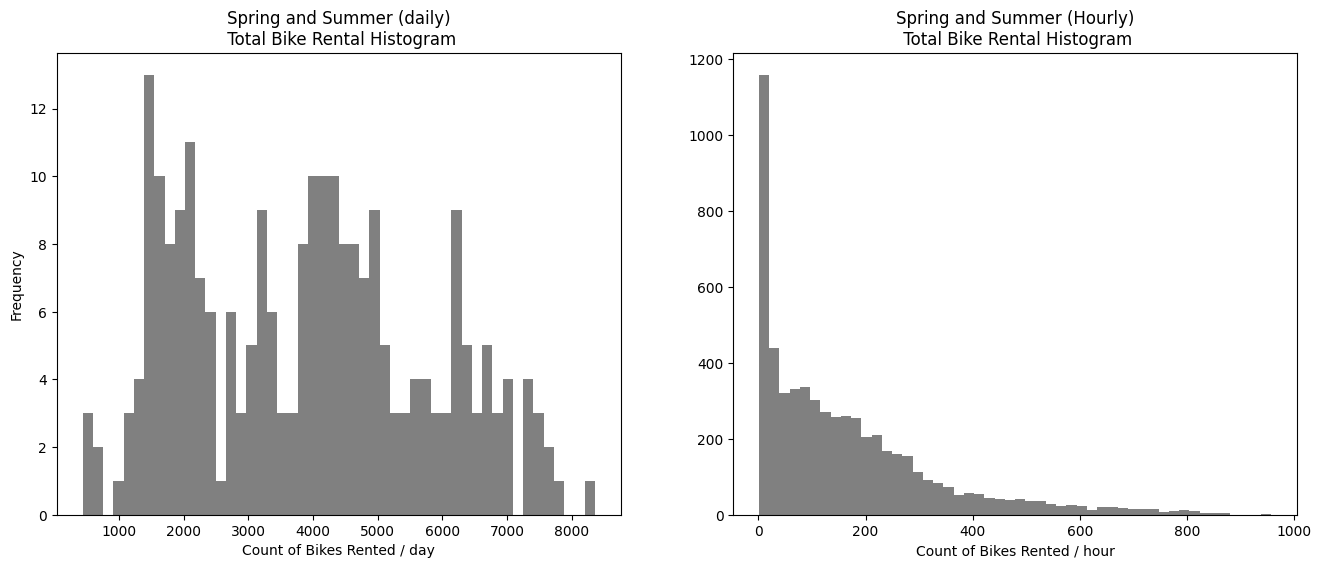

In [19]:
"""
Here I create two instances of the BikeData Class one with the hourly data
and one with the daily data. I then create subset of only working days and
non holiday days during spring and summer. The .data method calls a data
frame with the same column headings as the input data. The 'cnt' column is
The total count column. These are then plotted.
"""

daily = BikeData("day.csv")
hourly = BikeData("hour.csv")
spring_summer = daily.subset(leq={"season": 2}, eq={"holiday": 0, "workingday":1})
spring_summer_hour = hourly.subset(leq={"season": 2}, eq={"holiday": 0, "workingday":1})
s_s_count, s_s_count_hr = spring_summer.data["cnt"], spring_summer_hour.data["cnt"]
fig, ax = plt.subplots(1,2, figsize=(16, 6))
ax[0].hist(s_s_count, bins=50, color="grey")
ax[1].hist(s_s_count_hr, bins=50, color="grey")
ax[0].set_title("Spring and Summer (daily)\n Total Bike Rental Histogram")
ax[1].set_title("Spring and Summer (Hourly)\n Total Bike Rental Histogram")
ax[0].set_xlabel("Count of Bikes Rented / day")
ax[1].set_xlabel("Count of Bikes Rented / hour")
ax[0].set_ylabel("Frequency");

## Total Bike Rental Split By Season

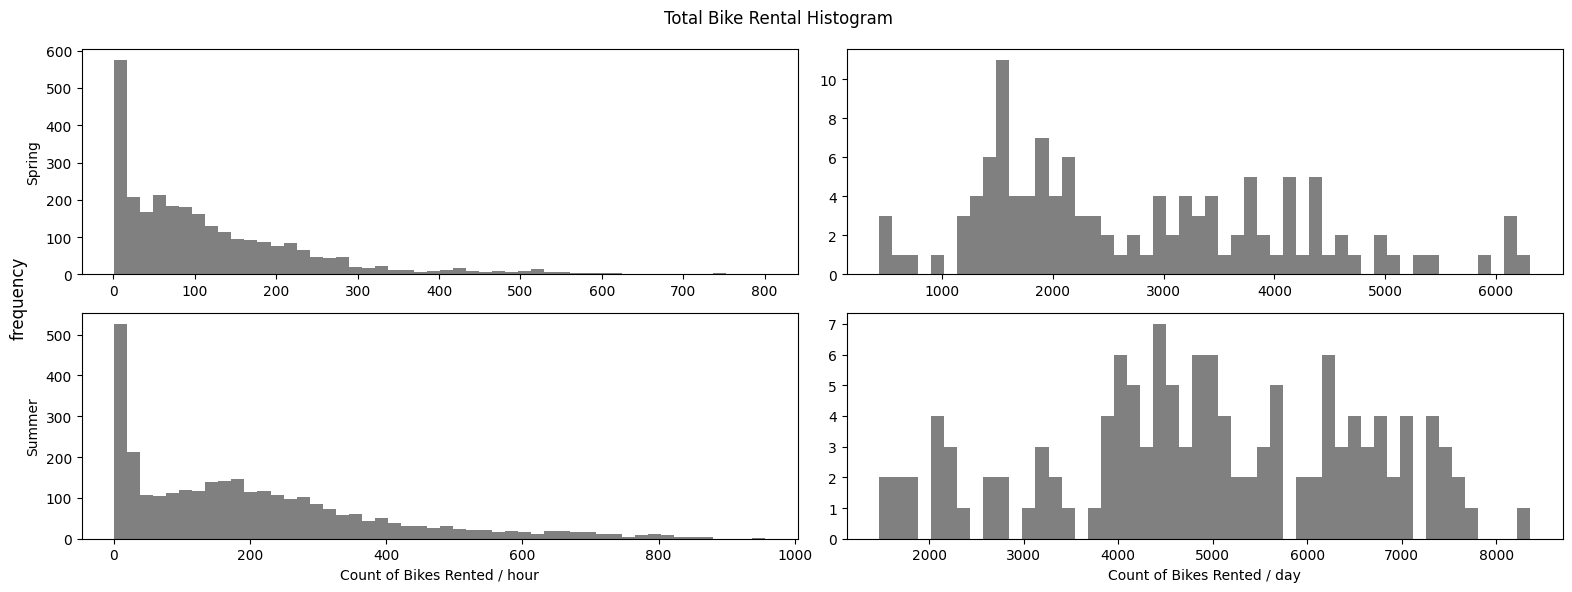

In [20]:
"""
Here I take the daily and hourly bikedata objects and make new subsets from
them. Where each one is a separate season.
"""
spring = daily.subset(eq={"season": 1,"holiday": 0, "workingday": 1})
summer = daily.subset(eq={"season": 2, "holiday": 0, "workingday": 1})
summer_h = hourly.subset(eq={"season": 2, "holiday": 0, "workingday": 1})
spring_h = hourly.subset(eq={"season": 1, "holiday": 0, "workingday": 1})
h_d = {"Spring": (spring_h, spring), "Summer": (summer_h, summer)}

fig, ax = plt.subplots(2, 2, figsize=(16, 6))
for i, (season, (hour, day)) in enumerate(h_d.items()):
    ax[i, 0].hist(hour.data["cnt"], bins=50, color="grey")
    ax[i, 1].hist(day.data["cnt"], bins=50, color="grey")
    ax[i, 0].set_ylabel(season)
fig.suptitle("Total Bike Rental Histogram")
ax[1, 1].set_xlabel("Count of Bikes Rented / day")
ax[1, 0].set_xlabel("Count of Bikes Rented / hour");
fig.supylabel("frequency")
fig.tight_layout();

## Peak Hours Total Bike Rental Split By Season

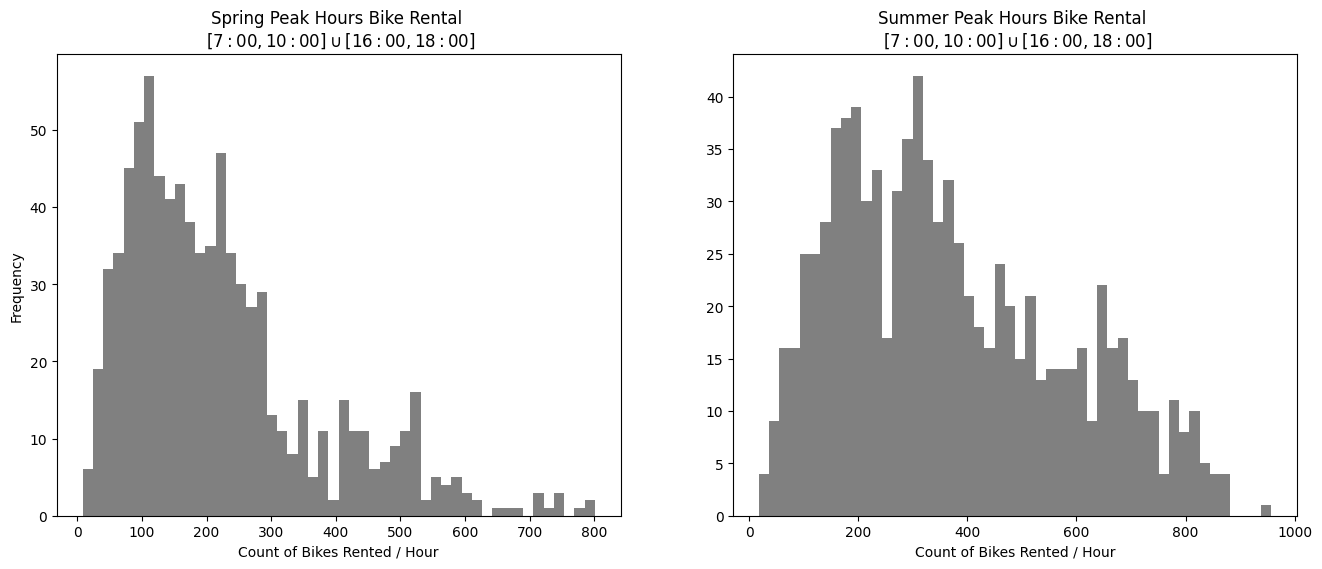

In [21]:
"""
In the final plot, I form new subsets where they are mutually exclusive.
The morning peak hours are the first selections using the geq and leq
operators. Then I use the union join operator, because the morning and
evening hours are mutually exclusive, I could have made subsets from the
previously created ones.
"""
summer_h = hourly.subset(leq={"hr": 10}, geq={"hr":7},
                        eq={"season": 2,"holiday": 0, "workingday": 1})
summer_h_up = hourly.subset(leq={"hr": 18}, geq={"hr":16},
                         eq={"season":2, "holiday": 0, "workingday": 1})
spring_h = hourly.subset(leq={"hr": 10}, geq={"hr":7},
                         eq={"season":1, "holiday": 0, "workingday": 1})
spring_h_up = hourly.subset(leq={ "hr": 18}, geq={"hr":16},
                         eq={"season": 1,"holiday": 0, "workingday": 1})
spring_peak = spring_h.union(spring_h_up)
summer_peak = summer_h.union(summer_h_up)

fig, ax = plt.subplots(1,2, figsize=(16,6))
ax[0].hist(spring_peak.data["cnt"], bins=50, color="grey")
ax[1].hist(summer_peak.data["cnt"], bins=50, color="grey")
ax[0].set_title("Spring Peak Hours Bike Rental \n $[7:00,10:00] \cup [16:00, 18:00]$")
ax[1].set_title("Summer Peak Hours Bike Rental \n $[7:00,10:00] \cup [16:00, 18:00]$")

ax[0].set_xlabel("Count of Bikes Rented / Hour")
ax[1].set_xlabel("Count of Bikes Rented / Hour")
ax[0].set_ylabel("Frequency");


# Data Exploration Notebook

Looking at different features of the bike rental data.

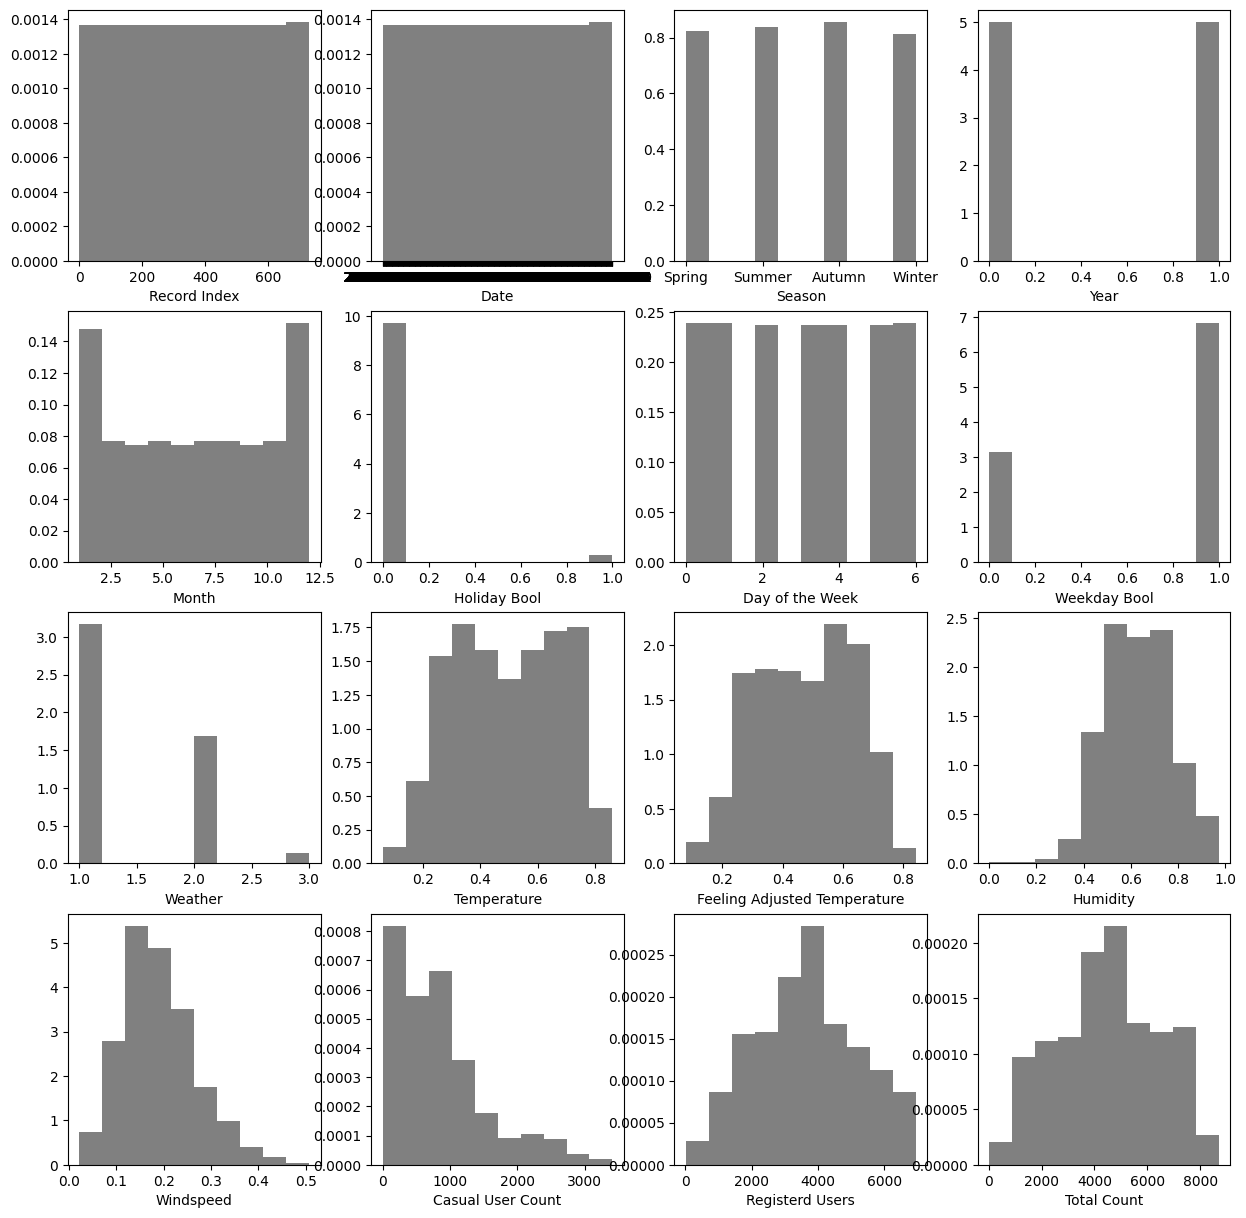

In [22]:
day_df = daily.data

season_list = ["Spring", "Summer", "Autumn", "Winter"]
year_dict = {0: "2011", 1: "2012"}
x_label_dict = ["Record Index", "Date", "Season", "Year",
                "Month", "Holiday Bool", "Day of the Week", "Weekday Bool", "Weather", "Temperature", "Feeling Adjusted Temperature", "Humidity", "Windspeed", "Casual User Count", "Registerd Users",
                "Total Count"
                ]
fig, ax = plt.subplots(4,4, figsize=(15,15))
for i, feature in enumerate(day_df.columns.tolist()):
    ax[i//4 ,i%4].hist(day_df[feature], density=True, color="grey")
    ax[i//4, i%4].set_xlabel(feature)
    ax[i//4, i%4].set_xlabel(x_label_dict[i])
ax[0, 2].set_xticks([i + 1 for i in range(4)], season_list);
ax[0, 1].set_xticks;

# Bike Hire Tasks Outlined
We have data from a bike hire scheme in washington, for days across two years. We are asked two questions about the dataset:
1. Does the bike hire data during peak hours across spring and summer, follow a normal distribution? To answer this question hypothesis testing is used.
2. Do the distributions of bike hire change between spring and summer?

These questions are clearly asked about a subset of the total data set. The data is only a member of summer spring, the peak times are clearly more important. Peak hours are quite ambiguous, and making the cutoff on my own without the team and visualisations is a bad idea. -Sean

